<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%204/LSTM_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# 1. Membuat dataset sinusoidal
data = np.cos(np.linspace(0, 100, 1000))
seq_length = 20

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, seq_length)
X = torch.FloatTensor(X).unsqueeze(-1)
y = torch.FloatTensor(y).unsqueeze(-1)


In [17]:
# 2. Definisi model LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


In [18]:
# 3. Inisialisasi model, loss, optimizer
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [19]:
# 4. Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/50], Loss: 0.0361
Epoch [20/50], Loss: 0.0101
Epoch [30/50], Loss: 0.0050
Epoch [40/50], Loss: 0.0008
Epoch [50/50], Loss: 0.0004


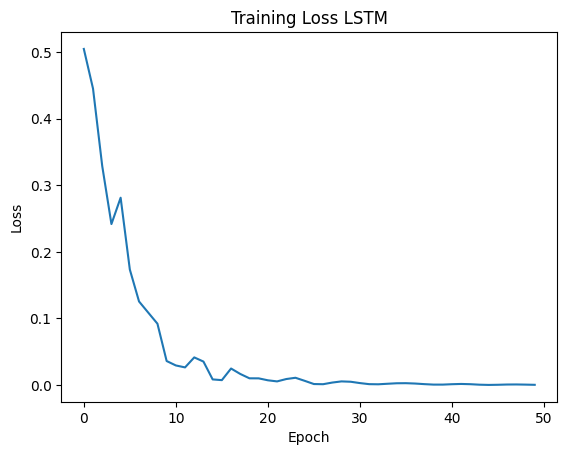

In [20]:
# 5. Plot loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss LSTM')
plt.show()



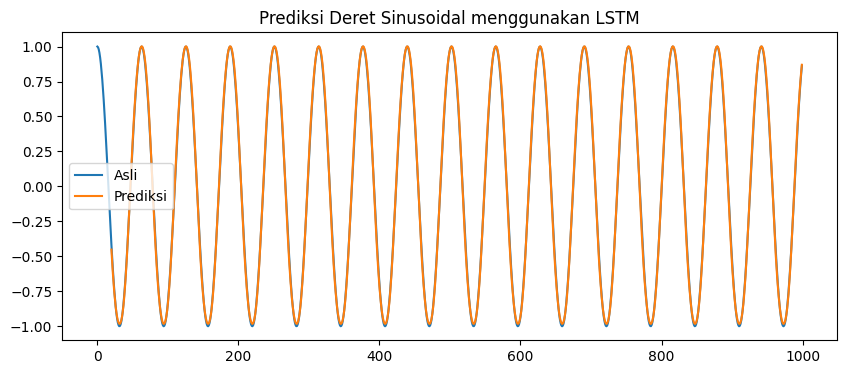

In [21]:
# 6. Prediksi
with torch.no_grad():
    preds = model(X).numpy()

plt.figure(figsize=(10,4))
plt.plot(data, label='Asli')
plt.plot(np.arange(seq_length, len(preds)+seq_length), preds, label='Prediksi')
plt.legend()
plt.title('Prediksi Deret Sinusoidal menggunakan LSTM')
plt.show()




In [22]:
hidden_sizes = [32, 64, 128]
print(f"Hidden sizes to test: {hidden_sizes}")

Hidden sizes to test: [32, 64, 128]


In [23]:
all_losses = {}

for hidden_size in hidden_sizes:
    print(f"\nTraining with hidden_size: {hidden_size}")

    # Re-initialize model, criterion, and optimizer for each hidden_size
    model = LSTMModel(input_size=1, hidden_size=hidden_size, output_size=1, num_layers=1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    current_losses = []
    epochs = 50 # Using 50 epochs as in the original training setup

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        current_losses.append(loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    all_losses[hidden_size] = current_losses

print("Training for all hidden sizes complete.")


Training with hidden_size: 32
Epoch [10/50], Loss: 0.0605
Epoch [20/50], Loss: 0.0084
Epoch [30/50], Loss: 0.0021
Epoch [40/50], Loss: 0.0008
Epoch [50/50], Loss: 0.0003

Training with hidden_size: 64
Epoch [10/50], Loss: 0.0526
Epoch [20/50], Loss: 0.0068
Epoch [30/50], Loss: 0.0026
Epoch [40/50], Loss: 0.0007
Epoch [50/50], Loss: 0.0004

Training with hidden_size: 128
Epoch [10/50], Loss: 0.2048
Epoch [20/50], Loss: 0.0325
Epoch [30/50], Loss: 0.0074
Epoch [40/50], Loss: 0.0009
Epoch [50/50], Loss: 0.0005
Training for all hidden sizes complete.


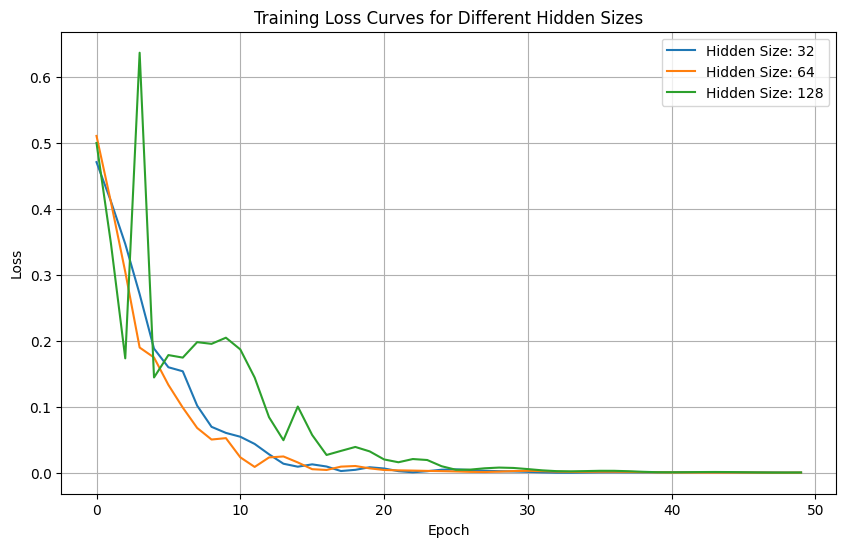

In [24]:
plt.figure(figsize=(10, 6))
for hidden_size, losses in all_losses.items():
    plt.plot(losses, label=f'Hidden Size: {hidden_size}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves for Different Hidden Sizes')
plt.legend()
plt.grid(True)
plt.show()


Generating predictions for hidden_size: 32


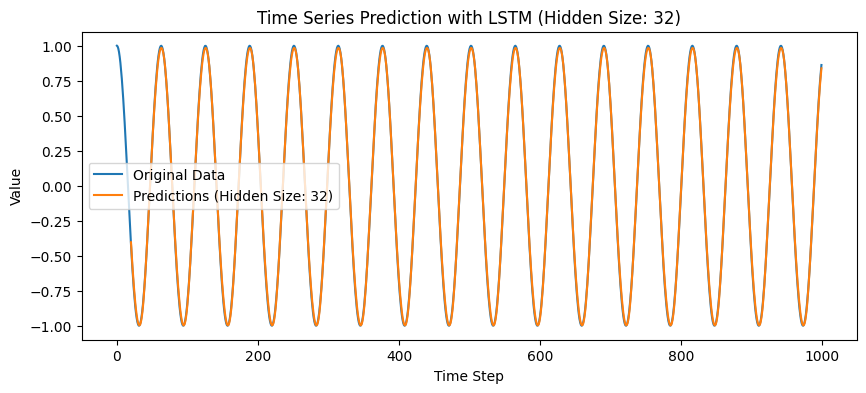


Generating predictions for hidden_size: 64


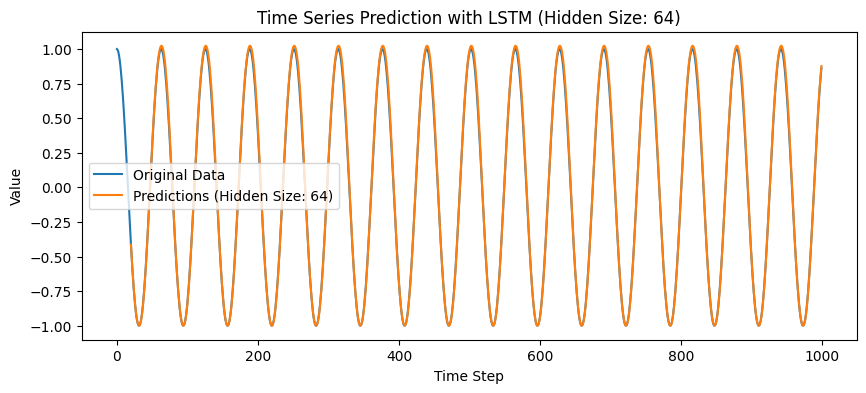


Generating predictions for hidden_size: 128


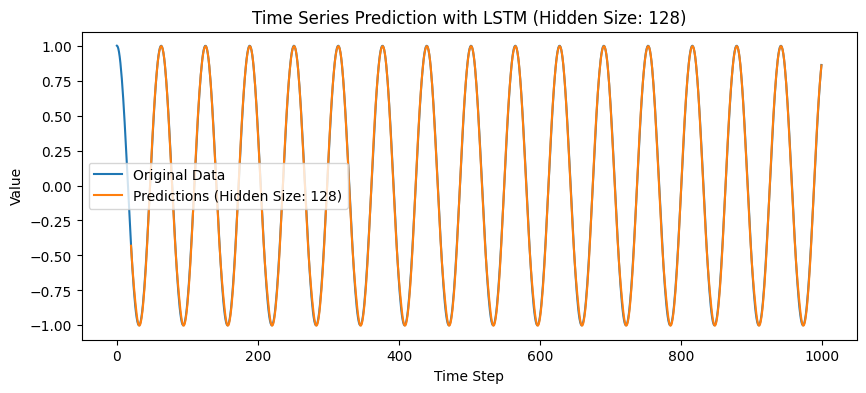

In [25]:
for hidden_size in hidden_sizes:
    print(f"\nGenerating predictions for hidden_size: {hidden_size}")


    model = LSTMModel(input_size=1, hidden_size=hidden_size, output_size=1, num_layers=1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    epochs = 50
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

    # Generate predictions
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        preds = model(X).numpy()

    # Plot predictions
    plt.figure(figsize=(10, 4))
    plt.plot(data, label='Original Data')
    # Adjust the x-axis for predictions to align with the original data
    plt.plot(np.arange(seq_length, len(preds) + seq_length), preds, label=f'Predictions (Hidden Size: {hidden_size})')
    plt.legend()
    plt.title(f'Time Series Prediction with LSTM (Hidden Size: {hidden_size})')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.show()